# Imports

In [2]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

# Transformer and Data Loader

In [3]:
# convert images to tensors 
# scale data between 0 and 1 
# normalize data 

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

trainset = datasets.MNIST('./DigitRecognitionData/Train/', download=True, train=True, transform=transform)
valset = datasets.MNIST('./DigitRecognitionData/Valid/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

# Display Images

In [4]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


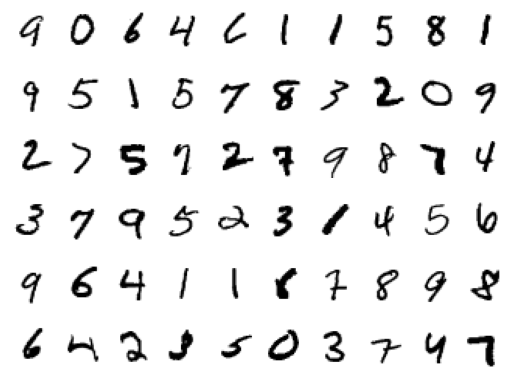

In [5]:
figure = plt.figure()

num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# Build the Neural Network

In [6]:
class NeuralNetwork:
    
    def __init__(self, hidden_sizes, trainloader, valloader):
        self.input_size = 784
        self.output_size = 10
        self.model = None
        self.train_loss_list = list()
        self.valid_loss_list = list()
        self.training_time = None
        self.test_accuracy = None
    
        self.hidden_sizes = hidden_sizes
        self.trainloader = trainloader
        self.valloader = valloader
        self.__define_model__()

    
    def __define_model__(self):
        self.model = nn.Sequential(
            nn.Linear(self.input_size, self.hidden_sizes[0]),
            nn.ReLU(),
            nn.Linear(self.hidden_sizes[0], self.hidden_sizes[1]),
            nn.ReLU(),
            nn.Linear(self.hidden_sizes[1], self.output_size),
            nn.LogSoftmax(dim=1)
        )

    
    def get_model_details(self):
        print(self.model)

    
    def train_model(self):
        time0 = time()
        epochs = 15
        optimizer = optim.SGD(self.model.parameters(), lr=0.003, momentum=0.9)
        criterion = nn.NLLLoss()

        # training
        print("Training Started \n")
        for e in range(1, epochs+1):
            running_loss = 0

            # training
            self.model.train()
            
            for images, labels in self.trainloader:
                images = images.view(images.shape[0], -1)      # flatten
            
                # Training pass
                optimizer.zero_grad()
                output = self.model(images)
                loss = criterion(output, labels)
                loss.backward()                                # backpropagation
                #And optimizes its weights here
                optimizer.step()
                
                running_loss += loss.item()
                
            self.train_loss_list.append((running_loss/len(self.trainloader)))

            running_loss = 0
            # evaluation
            self.model.eval()

            with torch.no_grad():
                for images, labels in self.valloader:
                    images = images.view(images.shape[0], -1)
                    output = self.model(images)
                    val_loss = criterion(output, labels)
                    running_loss += loss.item()

                self.valid_loss_list.append((running_loss/len(self.valloader)))

            message = 'Epoch {} done with training loss {} '.format(e, self.train_loss_list[-1]) + \
                  'validation loss {}'.format(self.valid_loss_list[-1])
            print(message)
            
        self.training_time = (time()-time0/60) 


    def test_model(self):
        correct_count, all_count = 0, 0
        
        for images, labels in self.valloader:
            for i in range(len(labels)):
                img = images[i].view(1, 784)          # flatten
                
                with torch.no_grad():
                    logps = self.model(img)

                ps = torch.exp(logps)
                probab = list(ps.numpy()[0])
                pred_label = probab.index(max(probab))
                true_label = labels.numpy()[i]
                
                if(true_label == pred_label):
                    correct_count += 1
                    
                all_count += 1

        self.test_accuracy = (correct_count/all_count)


    def visualization(self, figurename):
        plt.figure()
        plt.plot(self.train_loss_list)
        plt.plot(self.valid_loss_list)
        plt.title(f'Model Loss Graph for number of hidden neurons {self.hidden_sizes}')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train','Validation'], loc = 'upper left')
        plt.savefig(f'./Images/Problem_1/{figurename}.pdf')
        plt.show()

# With Given Number of Hidden Units

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)
Training Started 

Epoch 1 done with training loss 0.6560842945758723 validation loss 0.2912072539329529
Epoch 2 done with training loss 0.2921182775715076 validation loss 0.24653171002864838
Epoch 3 done with training loss 0.230609921917224 validation loss 0.3065122067928314
Epoch 4 done with training loss 0.1853565649032148 validation loss 0.18782636523246765
Epoch 5 done with training loss 0.15679507095342887 validation loss 0.22905941307544708
Epoch 6 done with training loss 0.13465878252646943 validation loss 0.07397401332855225
Epoch 7 done with training loss 0.11873025653450918 validation loss 0.06741105020046234
Epoch 8 done with training loss 0.10450578885756608 validation loss 0.20892424881458282
Epoch 9 done with training loss 0.093645

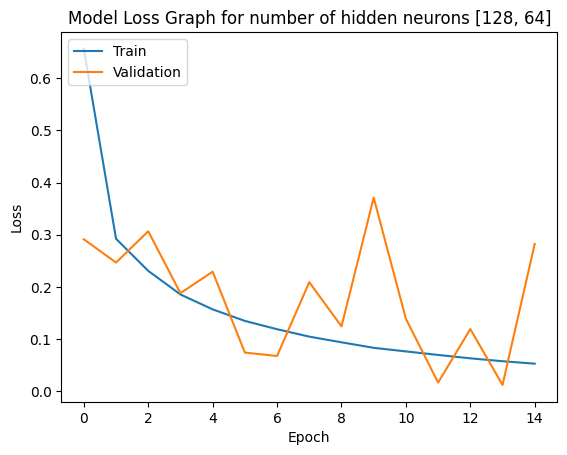

In [7]:
hidden_sizes = [128, 64]

firstNN = NeuralNetwork(hidden_sizes, trainloader, valloader)
firstNN.get_model_details()
firstNN.train_model()
firstNN.test_model()

train_loss = firstNN.train_loss_list
valid_loss = firstNN.valid_loss_list
print(firstNN.test_accuracy)

firstNN.visualization("Loss_graph_actual")

# Increase Hidden Units

### Double neurons in each layer

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)
Training Started 

Epoch 1 done with training loss 0.6108372550783381 validation loss 0.4404190182685852
Epoch 2 done with training loss 0.2663815103288589 validation loss 0.11804813891649246
Epoch 3 done with training loss 0.20341176235440697 validation loss 0.17589171230793
Epoch 4 done with training loss 0.16218689269126096 validation loss 0.2262948900461197
Epoch 5 done with training loss 0.13500263480775393 validation loss 0.0861058235168457
Epoch 6 done with training loss 0.11471362395394745 validation loss 0.04464695230126381
Epoch 7 done with training loss 0.09963647985179573 validation loss 0.1137094721198082
Epoch 8 done with training loss 0.0872221460520252 validation loss 0.053090520203113556
Epoch 9 done with training loss 0.077391

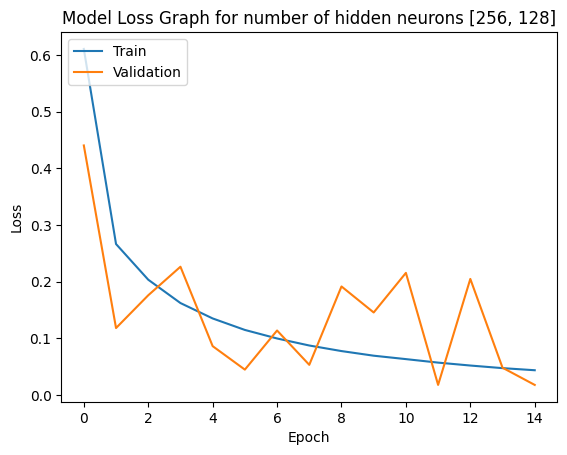

In [8]:
hidden_sizes = [256, 128]

firstNN = NeuralNetwork(hidden_sizes, trainloader, valloader)
firstNN.get_model_details()
firstNN.train_model()
firstNN.test_model()

train_loss = firstNN.train_loss_list
valid_loss = firstNN.valid_loss_list
print(firstNN.test_accuracy)

firstNN.visualization("Loss_graph_256_128")

### Double number of neurons again

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)
Training Started 

Epoch 1 done with training loss 0.5843561573196322 validation loss 0.38135358691215515
Epoch 2 done with training loss 0.2633335668403012 validation loss 0.27504870295524597
Epoch 3 done with training loss 0.19740714156217792 validation loss 0.10952255129814148
Epoch 4 done with training loss 0.15601041659847822 validation loss 0.040367014706134796
Epoch 5 done with training loss 0.1265691482602978 validation loss 0.04949409142136574
Epoch 6 done with training loss 0.10842086685928645 validation loss 0.022635720670223236
Epoch 7 done with training loss 0.09335637947560342 validation loss 0.0735907182097435
Epoch 8 done with training loss 0.0810077881325346 validation loss 0.10977853834629059
Epoch 9 done with training loss 0.

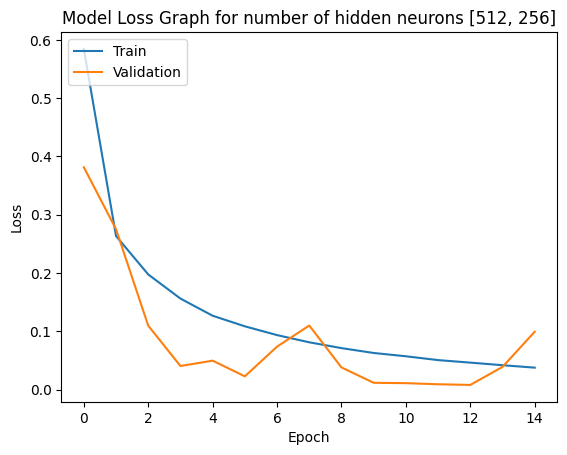

In [9]:
hidden_sizes = [512, 256]

firstNN = NeuralNetwork(hidden_sizes, trainloader, valloader)
firstNN.get_model_details()
firstNN.train_model()
firstNN.test_model()

train_loss = firstNN.train_loss_list
valid_loss = firstNN.valid_loss_list
print(firstNN.test_accuracy)

firstNN.visualization("Loss_graph_512_256")

No visible improvement or diminishment 